<a href="https://colab.research.google.com/github/BernardoRMendes/Projeto/blob/main/IndicadorPriceAction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

Nesse estudo apresento um indicador de Price Action que utiliza apenas dados de abertura, máxima, mínima e fechamento para detectar regiões de compra e venda.
O indicador está sem qualquer tipo de otimização, mostrando sua robustez.

Pode ser aplicado em qualquer ativo líquido. Em nosso exemplo, vamos observar seu comportamento no Ibovespa.

In [2]:
url="https://raw.githubusercontent.com/BernardoRMendes/Projeto/main/IndicadorPriceAction.csv"

In [3]:
df=pd.read_csv(url,sep=';',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 22/01/2021 to nan
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Abertura    1746 non-null   object 
 1   Máxima      1746 non-null   object 
 2   Mínima      1746 non-null   object 
 3   Fechamento  1746 non-null   object 
 4   Compra      1746 non-null   float64
 5   Venda       1746 non-null   float64
dtypes: float64(2), object(4)
memory usage: 392.9+ KB


In [5]:
df=df.dropna(axis=0)

In [6]:
df.head()

,Abertura,Máxima,Mínima,Fechamento,Compra,Venda
Data,,,,,,
22/01/2021,"118317,52","118317,52","116108,9","117380,49",0.0,2.0
21/01/2021,"119628,41","120242,86","117785,13","118328,99",0.0,2.0
20/01/2021,"120644,5","121449,1","118739,87","119646,4",0.0,3.0
19/01/2021,"121249,84","122120,24","119257,03","120636,39",0.0,3.0
18/01/2021,"120351,43","122585,82","120351,43","121241,63",0.0,3.0


In [7]:
df.tail()

,Abertura,Máxima,Mínima,Fechamento,Compra,Venda
Data,,,,,,
08/01/2014,"50431,23","50792,61","50423,58","50576,64",0.0,0.0
07/01/2014,"50981,58","51477,81","50429,14","50430,02",0.0,0.0
06/01/2014,"50980,15","51002,29","50451,42","50973,62",0.0,0.0
03/01/2014,"50348,27","50981,09","50268,72","50981,09",0.0,0.0
02/01/2014,"51522,19","51656,14","50246,3","50341,25",0.0,0.0


In [8]:
df["Abertura"]=df["Abertura"].str.replace(",",".")
df["Máxima"]=df["Máxima"].str.replace(",",".")
df["Mínima"]=df["Mínima"].str.replace(",",".")
df["Fechamento"]=df["Fechamento"].str.replace(",",".")

In [9]:
df["Abertura"]=df["Abertura"].astype(float)
df["Máxima"]=df["Máxima"].astype(float)
df["Mínima"]=df["Mínima"].astype(float)
df["Fechamento"]=df["Fechamento"].astype(float)

In [10]:
df=df[["Fechamento","Compra","Venda"]]

In [11]:
df=df.iloc[::-1]

In [12]:
df

,Fechamento,Compra,Venda
Data,,,
02/01/2014,50341.25,0.0,0.0
03/01/2014,50981.09,0.0,0.0
06/01/2014,50973.62,0.0,0.0
07/01/2014,50430.02,0.0,0.0
08/01/2014,50576.64,0.0,0.0
...,...,...,...
18/01/2021,121241.63,0.0,3.0
19/01/2021,120636.39,0.0,3.0
20/01/2021,119646.40,0.0,3.0


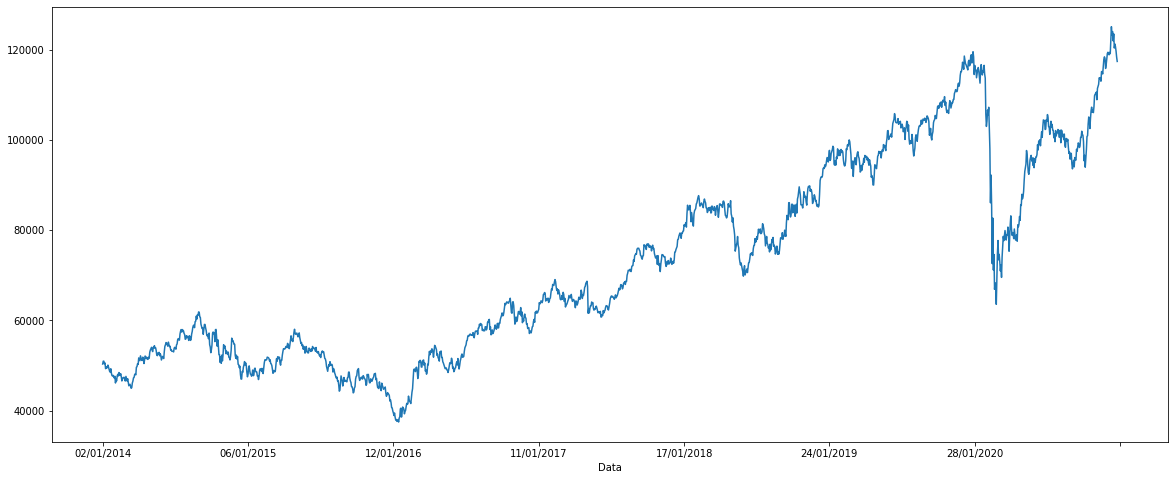

In [13]:
df["Fechamento"].plot(figsize=(20,8))

**Pontos de compra:**

[]

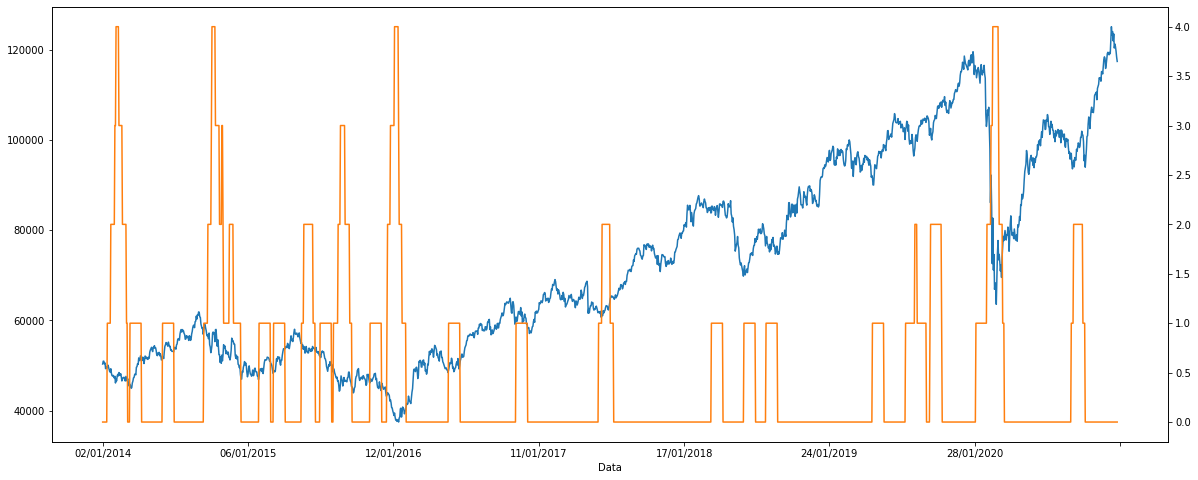

In [14]:
plt.figure()
df['Fechamento'].plot(figsize=(20,8))
df["Compra"].plot(figsize=(20,8),secondary_y=True)
plt.plot()

**Pontos de Venda:**

[]

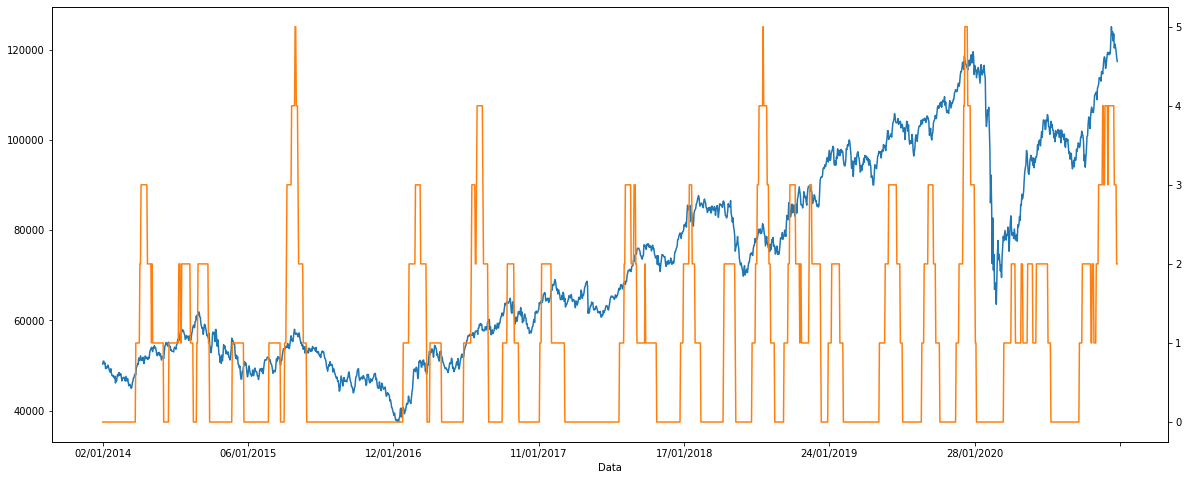

In [15]:
plt.figure()
df['Fechamento'].plot(figsize=(20,8))
df["Venda"].plot(figsize=(20,8),secondary_y=True)
plt.plot()

Para que o indicador performe ainda melhor, podemos estabelecer uma intensidade mínima para o sinal ser levado em consideração (acima de 3, por exemplo). Ainda podemos usar técnicas de Machine Learning (estudadas em outro projeto), para detectar em quais momentos a estratégia é mais assertiva.